In [74]:
library(dplyr)
library(tidyr)
library(ggplot2)

In [2]:
df = read.csv('Sleep_Efficiency.csv')
colSums(is.na(df))

ID                    Age                 Gender 
                     0                      0                      0 
               Bedtime            Wakeup.time         Sleep.duration 
                     0                      0                      0 
      Sleep.efficiency   REM.sleep.percentage  Deep.sleep.percentage 
                     0                      0                      0 
Light.sleep.percentage             Awakenings   Caffeine.consumption 
                     0                     20                     25 
   Alcohol.consumption         Smoking.status     Exercise.frequency 
                    16                      0                      6

In [4]:
df$Alcohol.consumption[is.na(df$Alcohol.consumption)] <- round(mean(df$Alcohol.consumption, na.rm = TRUE))
df$Caffeine.consumption[is.na(df$Caffeine.consumption)] <- round(mean(df$Caffeine.consumption, na.rm = TRUE))
df$Awakenings[is.na(df$Awakenings)] <- round(mean(df$Awakenings, na.rm = TRUE))
df$Exercise.frequency[is.na(df$Exercise.frequency)] <- round(mean(df$Exercise.frequency, na.rm = TRUE))

In [5]:
colSums(is.na(df))

ID                    Age                 Gender 
                     0                      0                      0 
               Bedtime            Wakeup.time         Sleep.duration 
                     0                      0                      0 
      Sleep.efficiency   REM.sleep.percentage  Deep.sleep.percentage 
                     0                      0                      0 
Light.sleep.percentage             Awakenings   Caffeine.consumption 
                     0                      0                      0 
   Alcohol.consumption         Smoking.status     Exercise.frequency 
                     0                      0                      0

In [6]:
# binned ages
age_bins = c(0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, max(df$Age))
age_bins_labels = c('0-15','15-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','60+')
df$binnedAge = cut(df$Age, breaks=age_bins, labels=age_bins_labels)

# Tab1 charts 

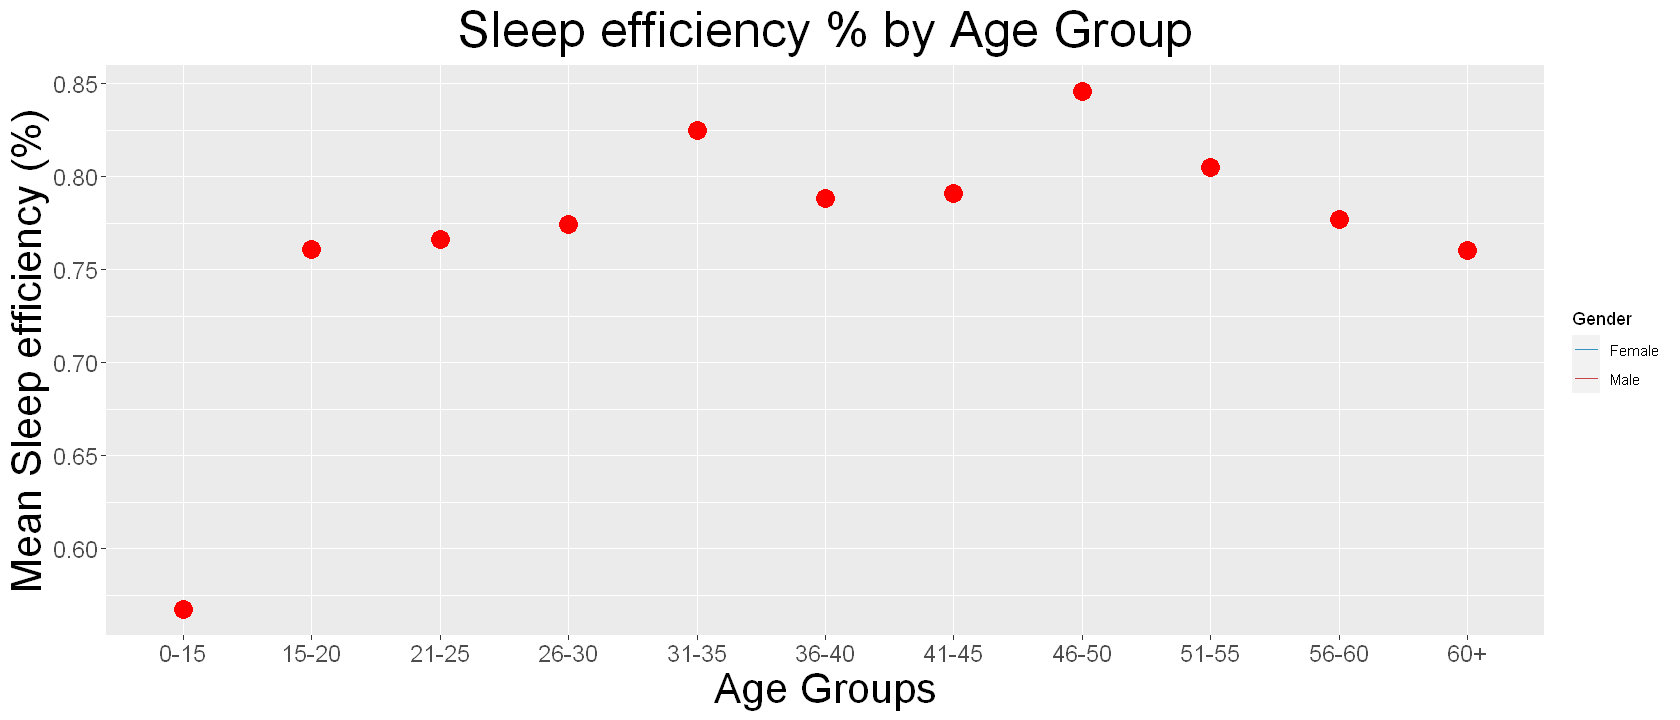

In [19]:
options(repr.plot.width=14, repr.plot.height=6)

sleepeffdf = 
    df %>% 
    select(binnedAge, Sleep.efficiency, Gender) %>%
    group_by(binnedAge) %>%
    mutate(meansleep = mean(Sleep.efficiency, na.rm = TRUE)) 

age_sleepeff_line2 = ggplot(sleepeffdf, aes(x = binnedAge, y = meansleep, color = Gender)) + 
geom_point(size = 5, color="red") +
geom_line() +  
scale_color_manual(values = c('#3493bf', '#c74448')) +
labs(title = "Sleep efficiency % by Age Group",
   x = "Age Groups",
   y = "Mean Sleep efficiency (%)",
   color = "Gender") +
theme(axis.title.x = element_text(size = 25), 
    axis.title.y = element_text(size = 25), 
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.text.y = element_text(size = 14),
    axis.text.x = element_text(size = 14)) 

age_sleepeff_line2

Cannot overlay a line plot on this points plot

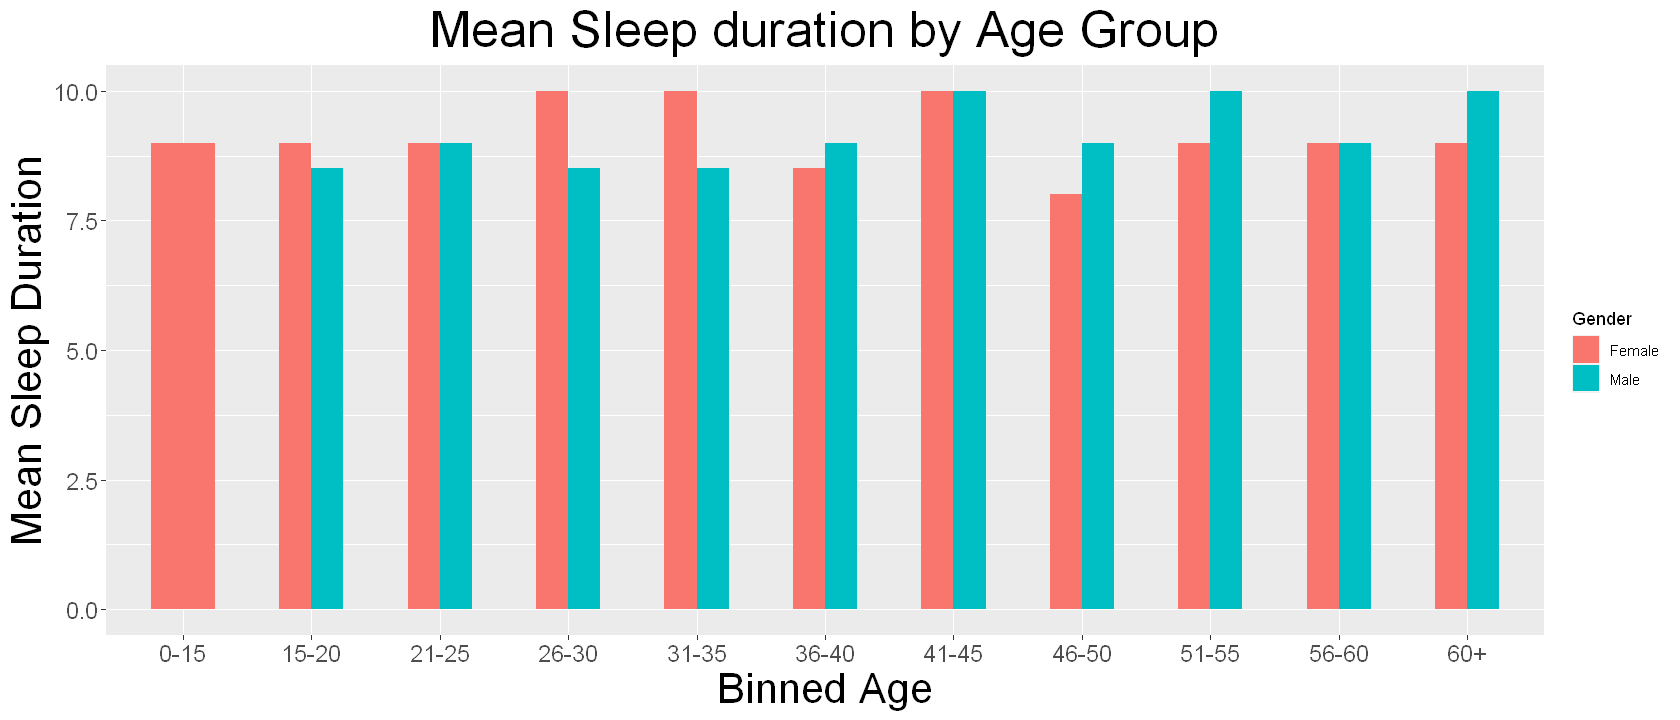

In [10]:
options(repr.plot.width=14, repr.plot.height=6)

age_sleepdur_bar = 
ggplot(df, aes(x = binnedAge, y = Sleep.duration, fill = Gender)) +
geom_col(position = position_dodge(), width = 0.5) +
labs(title = "Mean Sleep duration by Age Group" , x = "Binned Age", y = "Mean Sleep Duration", fill = "Gender") +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
    axis.title.y = element_text(size = 25), 
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.text.y = element_text(size = 14),
    axis.text.x = element_text(size = 14)) 

age_sleepdur_bar

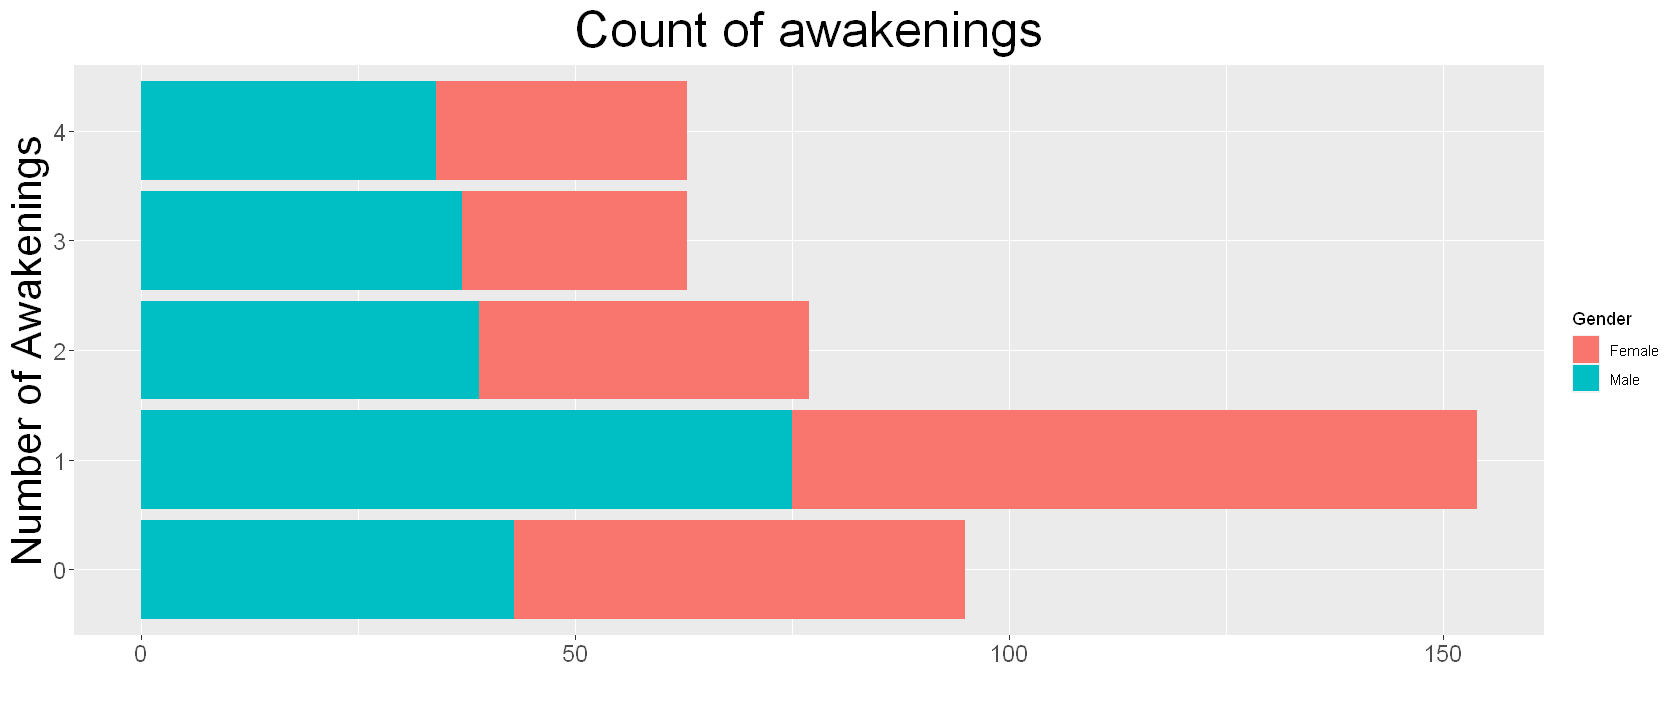

In [73]:
awakening_bar = 
ggplot(df, aes(x = factor(Awakenings), fill = Gender)) +
geom_bar() +
coord_flip() +
labs(title = "Count of awakenings", x = "Number of Awakenings", y = "", fill = "Gender") +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
    axis.title.y = element_text(size = 25), 
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.text.y = element_text(size = 14),
    axis.text.x = element_text(size = 14)) 
awakening_bar

# Tab2 charts

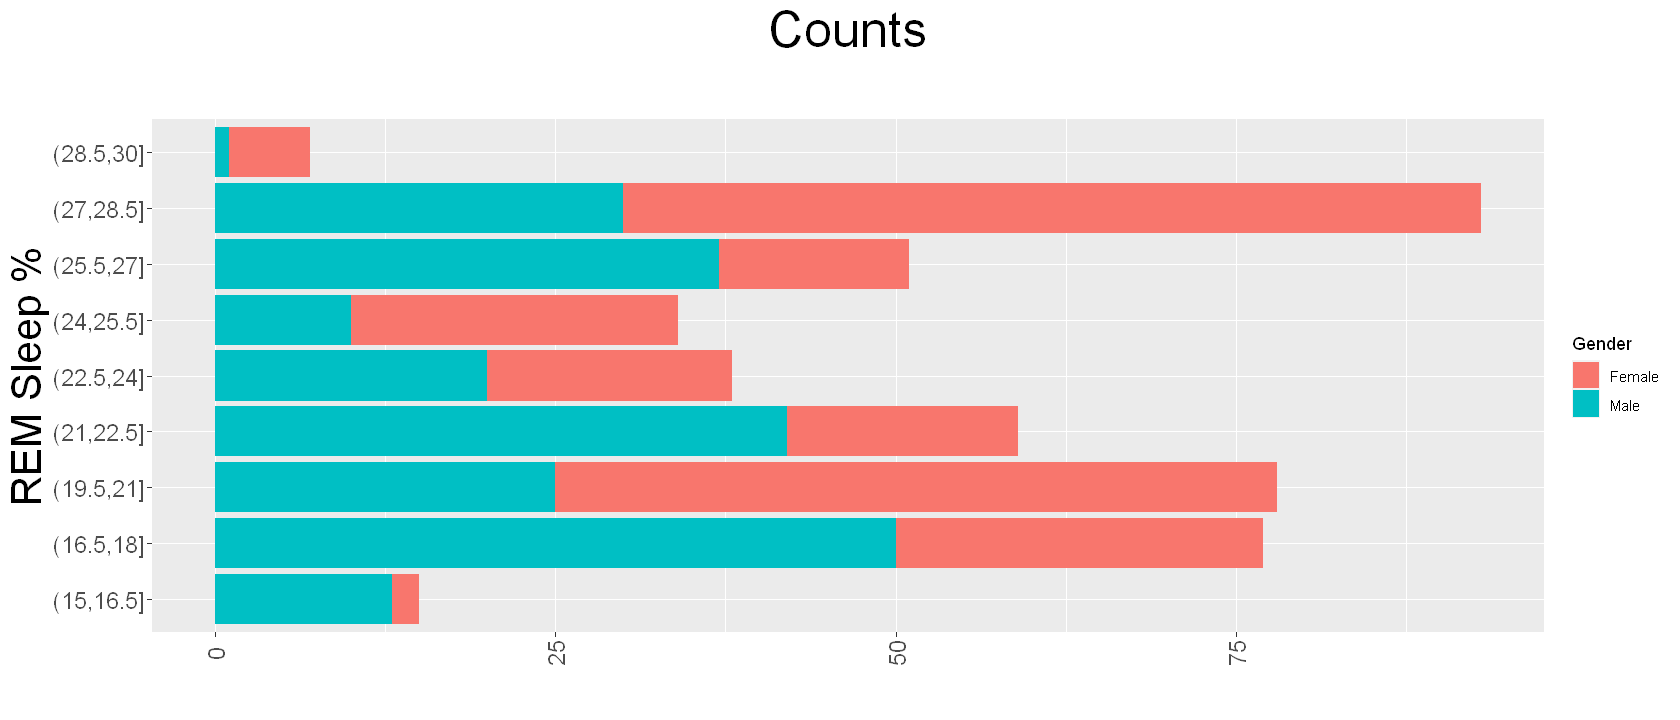

In [67]:
options(repr.plot.width=14, repr.plot.height=6)

thisdata = 
    df %>% 
    select(REM.sleep.percentage, Gender) %>%
    mutate(REM.sleep.bin = cut(df$REM.sleep.percentage, breaks = 10, include.lowest = FALSE))

ggplot(thisdata, aes(x = REM.sleep.bin, fill = Gender)) +
geom_bar() +
coord_flip() +
labs(x = "REM Sleep %", 
     y = "", 
     title = "Counts\n") +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
axis.title.y = element_text(size = 25), 
plot.title = element_text(size = 30, hjust = 0.5),
axis.text.y = element_text(size = 14),
axis.text.x = element_text(angle = 90, vjust = 0.5, size = 14)) 

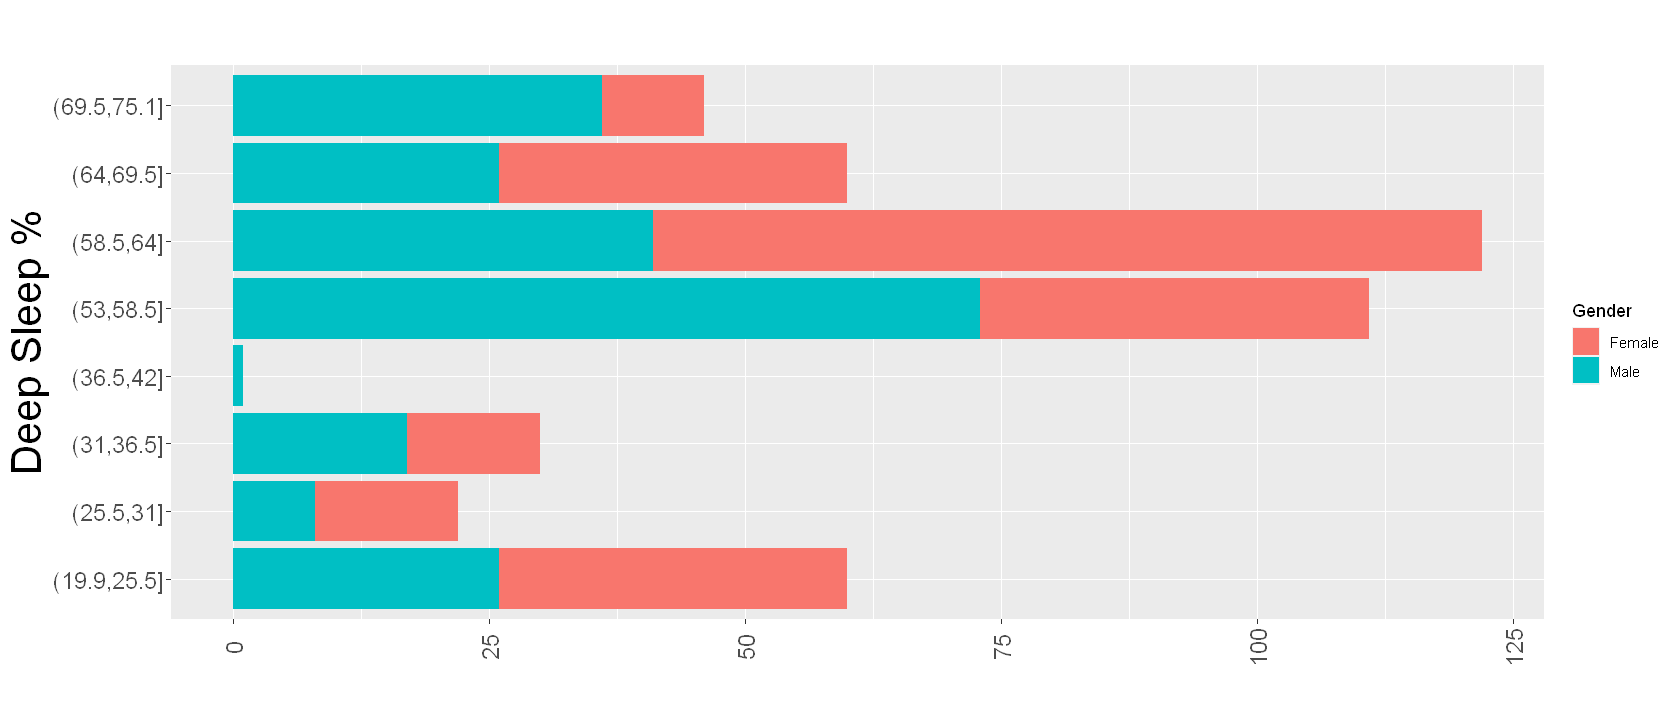

In [68]:
options(repr.plot.width=14, repr.plot.height=6)

thisdata = 
    df %>% 
    select(Deep.sleep.percentage, Gender) %>%
    mutate(Deep.sleep.bin = cut(df$Deep.sleep.percentage, breaks = 10, include.lowest = FALSE))

ggplot(thisdata, aes(x = Deep.sleep.bin, fill = Gender)) +
geom_bar() +
coord_flip() +
labs(x = "Deep Sleep %", 
     y = "", 
     title = "") +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
axis.title.y = element_text(size = 25), 
plot.title = element_text(size = 30, hjust = 0.5),
axis.text.y = element_text(size = 14),
axis.text.x = element_text(angle = 90, vjust = 0.5, size = 14)) 

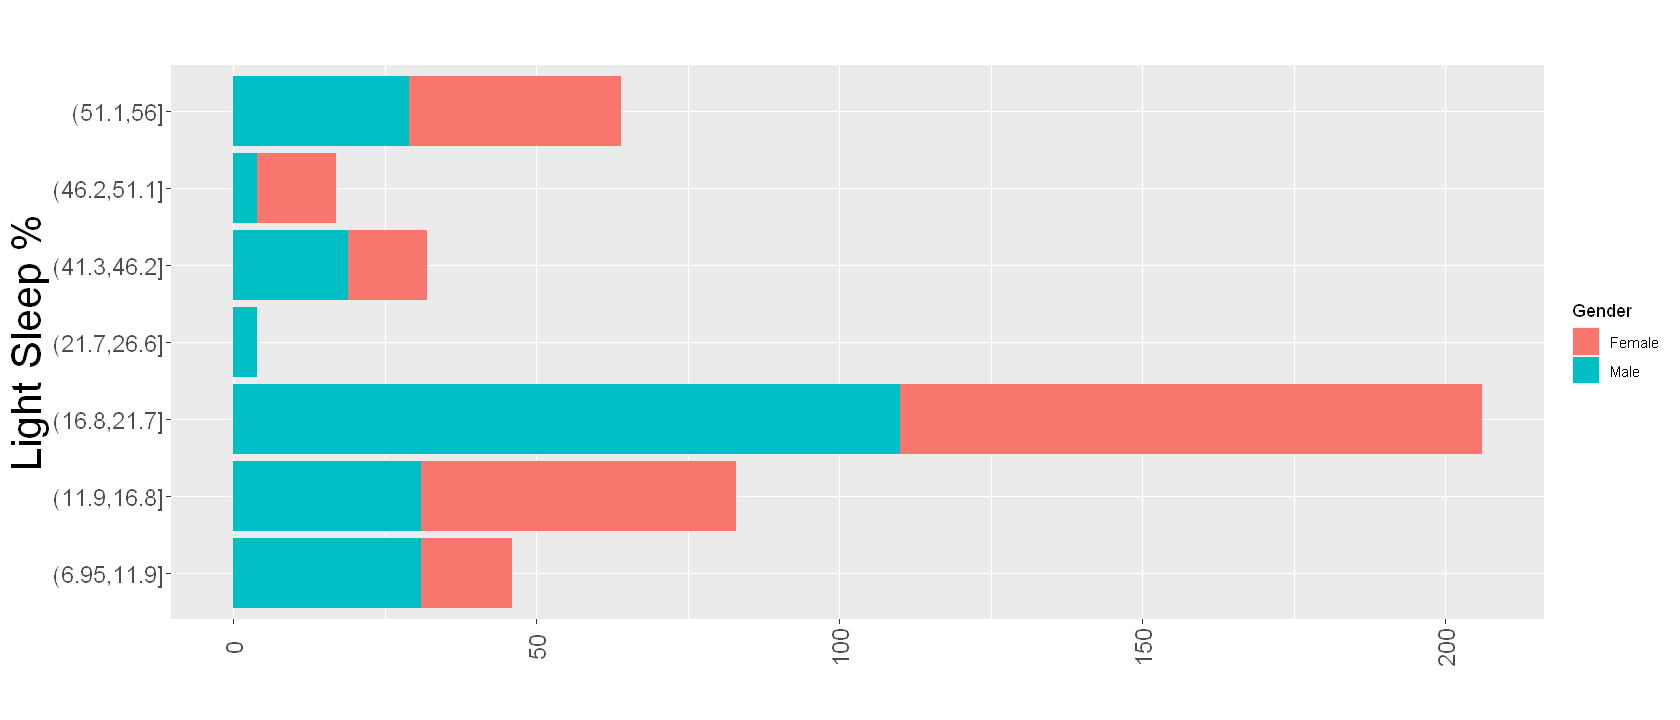

In [70]:
options(repr.plot.width=14, repr.plot.height=6)

thisdata = 
    df %>% 
    select(Light.sleep.percentage, Gender) %>%
    mutate(Light.sleep.bin = cut(df$Light.sleep.percentage, breaks = 10, include.lowest = FALSE))

ggplot(thisdata, aes(x = Light.sleep.bin, fill = Gender)) +
geom_bar() +
coord_flip() +
labs(x = "Light Sleep %", 
     y = "", 
     title = "") +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
axis.title.y = element_text(size = 25), 
plot.title = element_text(size = 30, hjust = 0.5),
axis.text.y = element_text(size = 14),
axis.text.x = element_text(angle = 90, vjust = 0.5, size = 14)) 

In [ ]:
# install.packages("remotes")
# remotes::install_github("plotly/dashR", upgrade = "always")
# install.packages("dashHtmlComponents")
#install.packages("remotes")
remotes::install_github("plotly/dashR", upgrade = "always", force = TRUE)
install_github('facultyai/dash-bootstrap-components@r-release')

In [ ]:
library(dash)
# library(dashHtmlComponents)

app = Dash$new(external_stylesheets = "https://codepen.io/chriddyp/pen/bWLwgP.css")

app$layout(
    htmlDiv(
        htmlH1('I am alive!!',
               style=list('color' = 'cyan', 'background-color' = '#000000')
               )
        )
    )

app$run_server(debug = T)